# Task 02- RFM Clustering

In [1]:
 import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('OldCustomerList.csv')
df.head()

,customer_id,first_name,last_name,gender,age,DOB,address,postcode,country,state,...,past_3_years_bike_related_purchases,property_valuation,wealth_segment,tenure,deceased_indicator,owns_car,frequency,monetary,recency,% approved
0,1,Laraine,Medendorp,1,64,1953-10-12,060 Morning Avenue,2016,Australia,NSW,...,93,10,Mass Customer,11,0,1,11,3018.09,8.0,100.0
1,2,Eli,Bockman,0,37,1980-12-16,6 Meadow Vale Court,2153,Australia,NSW,...,81,10,Mass Customer,16,0,1,3,2226.26,129.0,100.0
2,4,Talbot,NaN,0,56,1961-10-03,0 Holy Cross Court,4211,Australia,QLD,...,33,9,Mass Customer,7,0,0,2,220.57,196.0,100.0
3,5,Sheila-kathryn,Calton,1,40,1977-05-13,17979 Del Mar Point,2448,Australia,NSW,...,56,4,Affluent Customer,8,0,1,6,2394.94,17.0,100.0
4,6,Curr,Duckhouse,0,51,1966-09-16,9 Oakridge Court,3216,Australia,VIC,...,35,9,High Net Worth,13,0,1,5,3946.55,65.0,100.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3995 non-null   int64  
 1   first_name                           3995 non-null   object 
 2   last_name                            3870 non-null   object 
 3   gender                               3995 non-null   int64  
 4   age                                  3995 non-null   int64  
 5   DOB                                  3908 non-null   object 
 6   address                              3995 non-null   object 
 7   postcode                             3995 non-null   int64  
 8   country                              3995 non-null   object 
 9   state                                3995 non-null   object 
 10  job_title                            3491 non-null   object 
 11  job_industry_category         

In [8]:
RFM = df.loc[:, ['customer_id', 'frequency', 'monetary', 'recency']].copy()

In [9]:
scaler=StandardScaler()
scaled=scaler.fit_transform(RFM)

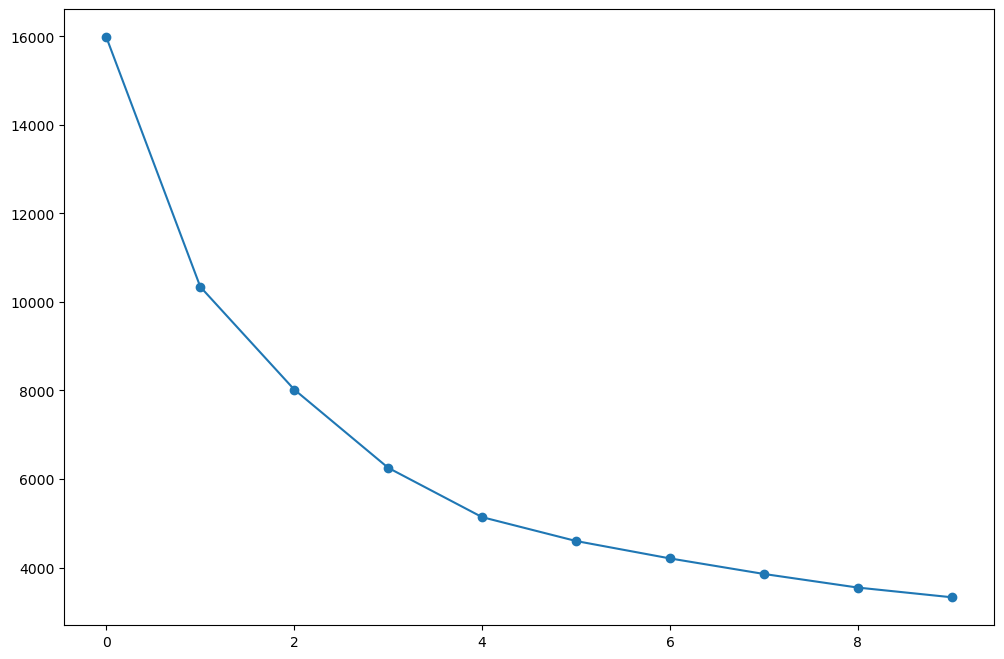

In [10]:
from sklearn.cluster import KMeans

inertia=[]

for i in np.arange(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o")

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["clusters"] = (kmeans.labels_+1)

In [12]:
RFM

,customer_id,frequency,monetary,recency,clusters
0,1,11,3018.09,8.000000,1
1,2,3,2226.26,129.000000,3
2,4,2,220.57,196.000000,3
3,5,6,2394.94,17.000000,1
4,6,5,3946.55,65.000000,1
...,...,...,...,...,...
3990,3996,0,0.00,63.489246,2
3991,3997,0,0.00,63.489246,2
3992,3998,0,0.00,63.489246,2
3993,3999,0,0.00,63.489246,2


In [13]:
clusters = RFM.loc[:, ['customer_id', 'clusters']].copy()

In [14]:
df = df.merge(clusters, on='customer_id', how='left')
df.head()

,customer_id,first_name,last_name,gender,age,DOB,address,postcode,country,state,...,property_valuation,wealth_segment,tenure,deceased_indicator,owns_car,frequency,monetary,recency,% approved,clusters
0,1,Laraine,Medendorp,1,64,1953-10-12,060 Morning Avenue,2016,Australia,NSW,...,10,Mass Customer,11,0,1,11,3018.09,8.0,100.0,1
1,2,Eli,Bockman,0,37,1980-12-16,6 Meadow Vale Court,2153,Australia,NSW,...,10,Mass Customer,16,0,1,3,2226.26,129.0,100.0,3
2,4,Talbot,NaN,0,56,1961-10-03,0 Holy Cross Court,4211,Australia,QLD,...,9,Mass Customer,7,0,0,2,220.57,196.0,100.0,3
3,5,Sheila-kathryn,Calton,1,40,1977-05-13,17979 Del Mar Point,2448,Australia,NSW,...,4,Affluent Customer,8,0,1,6,2394.94,17.0,100.0,1
4,6,Curr,Duckhouse,0,51,1966-09-16,9 Oakridge Court,3216,Australia,VIC,...,9,High Net Worth,13,0,1,5,3946.55,65.0,100.0,1


In [15]:
df1 = df.loc[df['clusters'] == 1].copy()
df2 = df.loc[df['clusters'] == 2].copy()
df3 = df.loc[df['clusters'] == 3].copy()


In [16]:
df1[['frequency','monetary','recency']].describe()

,frequency,monetary,recency
count,2238.000000,2238.000000,2238.000000
mean,6.619750,3758.732976,36.189008
std,1.988726,1636.427378,28.044277
min,2.000000,263.540000,1.000000
25%,5.000000,2552.230000,13.000000
50%,6.000000,3529.640000,30.000000
75%,8.000000,4738.482500,53.750000
max,14.000000,11668.950000,161.000000


Cluster 01 is made up of 863 customers who have a high monetary value, frequent purchase behavior, and relatively high recency scores. This indicates that they are profitable and valuable to the business, but they may not be as engaged or loyal as other customers.

In [17]:
df2[['frequency','monetary','recency']].describe()

,frequency,monetary,recency
count,894.000000,894.000000,894.000000
mean,1.436242,589.118949,55.479895
std,1.816271,835.690400,21.800232
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,49.000000
50%,0.000000,0.000000,63.489246
75%,3.000000,1181.087500,63.489246
max,7.000000,3533.560000,130.000000


Cluster 02: consists of 894 customers who have low monetary value, infrequent purchase behavior, and high recency scores. These customers may not be as profitable or valuable to the business compared to other segments.

In [18]:
df3[['frequency','monetary','recency']].describe()

,frequency,monetary,recency
count,863.000000,863.000000,863.000000
mean,3.834299,1939.195203,142.537659
std,1.509177,1137.299364,58.215343
min,1.000000,0.000000,25.000000
25%,3.000000,1028.325000,99.000000
50%,4.000000,1860.560000,134.000000
75%,5.000000,2658.120000,172.500000
max,10.000000,5880.330000,354.000000


Cluster 03: comprises 2238 customers with high monetary value, frequent purchase behavior, and low recency scores. These customers are likely to be profitable and valuable to the business, and their continued engagement suggests they are loyal to the brand.

In [20]:
transact = pd.read_csv('Transactions.csv')
transact.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46


In [21]:
transact = transact.merge(clusters, on='customer_id', how='left')
transact.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,clusters
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,2.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,1.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1.0


In [22]:
transact1 = transact.loc[transact['clusters'] == 1].copy()
transact2 = transact.loc[transact['clusters'] == 2].copy()
transact3 = transact.loc[transact['clusters'] == 3].copy()

# High value customers

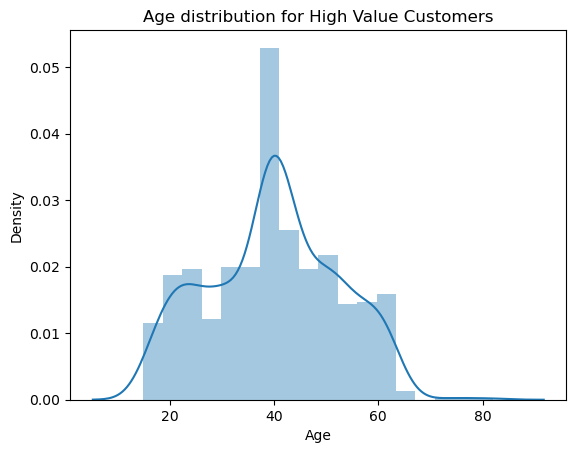

In [23]:
ax = sns.distplot(df3['age']);
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.set_title("Age distribution for High Value Customers")
plt.show()

In [24]:
df3['age'].describe()

count    863.000000
mean      39.853998
std       12.494342
min       15.000000
25%       31.000000
50%       40.000000
75%       49.000000
max       82.000000
Name: age, dtype: float64

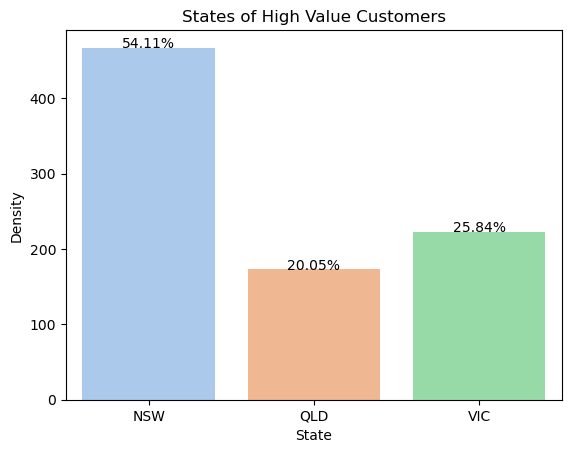

In [25]:
custom_palette = sns.color_palette('pastel', n_colors=3)
ax = sns.countplot(data=df3, x='state', palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}%'.format(height * 100 / len(df3['state'])),
            ha="center")

ax.set_xlabel('State')
ax.set_ylabel('Density')
ax.set_title("States of High Value Customers")
plt.show()

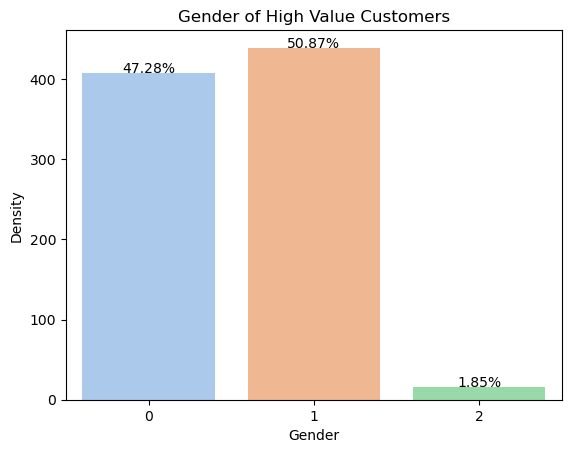

In [26]:
custom_palette = sns.color_palette('pastel', n_colors=3)
ax = sns.countplot(data=df3, x='gender', palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}%'.format(height * 100 / len(df3['state'])),
            ha="center")

ax.set_xlabel('Gender')
ax.set_ylabel('Density')
ax.set_title("Gender of High Value Customers")
plt.show()

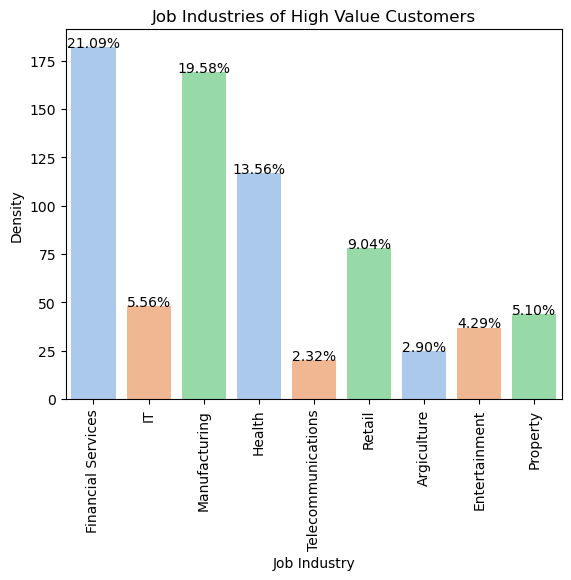

In [27]:
custom_palette = sns.color_palette('pastel', n_colors=3)
ax = sns.countplot(data=df3, x='job_industry_category', palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}%'.format(height * 100 / len(df3['state'])),
            ha="center")

ax.set_xlabel('Job Industry')
ax.set_ylabel('Density')
ax.set_title("Job Industries of High Value Customers")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

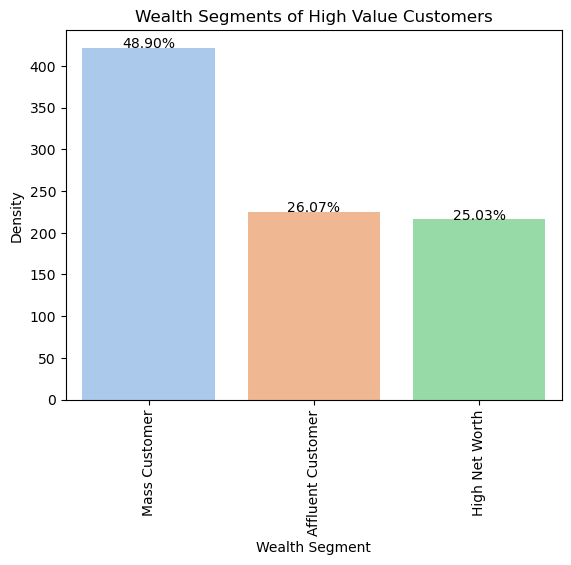

In [28]:
custom_palette = sns.color_palette('pastel', n_colors=3)
ax = sns.countplot(data=df3, x='wealth_segment', palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}%'.format(height * 100 / len(df3['state'])),
            ha="center")

ax.set_xlabel('Wealth Segment')
ax.set_ylabel('Density')
ax.set_title("Wealth Segments of High Value Customers")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


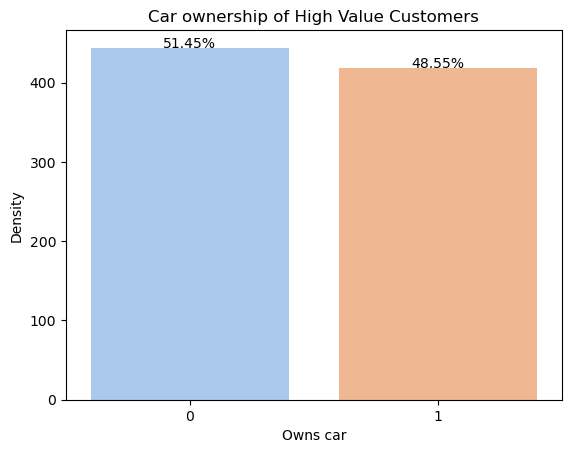

In [29]:
custom_palette = sns.color_palette('pastel', n_colors=3)
ax = sns.countplot(data=df3, x='owns_car', palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}%'.format(height * 100 / len(df3['state'])),
            ha="center")

ax.set_xlabel('Owns car')
ax.set_ylabel('Density')
ax.set_title("Car ownership of High Value Customers")
plt.show()

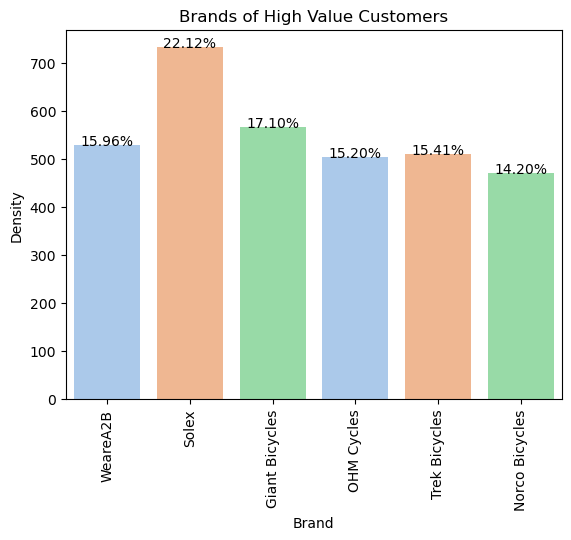

In [30]:
custom_palette = sns.color_palette('pastel', n_colors=3)
ax = sns.countplot(data=transact3, x='brand', palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}%'.format(height * 100 / len(transact3['brand'])),
            ha="center")

ax.set_xlabel('Brand')
ax.set_ylabel('Density')
ax.set_title("Brands of High Value Customers")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [31]:
transact3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 6 to 19434
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           3309 non-null   int64  
 1   product_id               3309 non-null   int64  
 2   customer_id              3309 non-null   int64  
 3   transaction_date         3309 non-null   object 
 4   online_order             3309 non-null   float64
 5   order_status             3309 non-null   object 
 6   brand                    3309 non-null   object 
 7   product_line             3309 non-null   object 
 8   product_class            3309 non-null   object 
 9   product_size             3309 non-null   object 
 10  list_price               3309 non-null   float64
 11  standard_cost            3309 non-null   float64
 12  product_first_sold_date  3309 non-null   object 
 13  clusters                 3309 non-null   float64
dtypes: float64(4), int64(3)

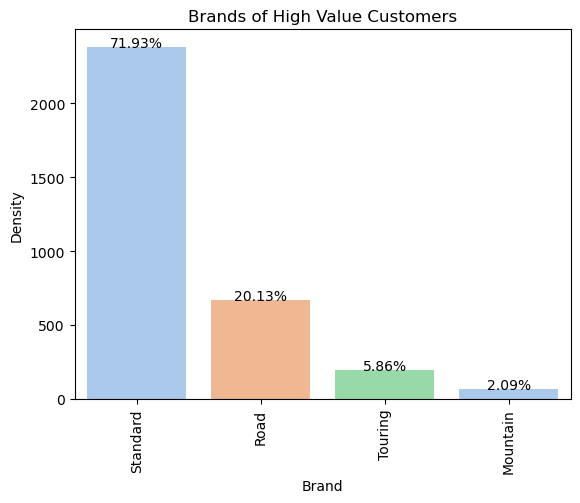

In [32]:
custom_palette = sns.color_palette('pastel', n_colors=3)
ax = sns.countplot(data=transact3, x='product_line', palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}%'.format(height * 100 / len(transact3['brand'])),
            ha="center")

ax.set_xlabel('Brand')
ax.set_ylabel('Density')
ax.set_title("Brands of High Value Customers")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

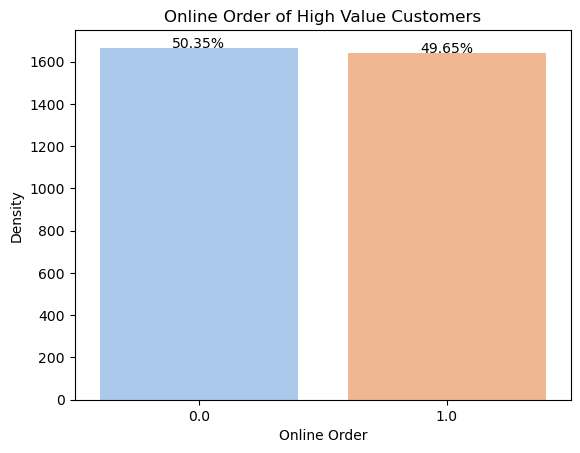

In [33]:
custom_palette = sns.color_palette('pastel', n_colors=3)
ax = sns.countplot(data=transact3, x='online_order', palette=custom_palette)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height,
            '{:.2f}%'.format(height * 100 / len(transact3['brand'])),
            ha="center")

ax.set_xlabel('Online Order')
ax.set_ylabel('Density')
ax.set_title("Online Order of High Value Customers")
plt.show()